In [2]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
from mplsoccer import add_image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import pandas as pd

In [3]:
font_path_regular = '/Users/alfonsomarino/Desktop/Teko/static/Teko-Regular.ttf'
# Create a font properties object with the font file
font_normal = font_manager.FontProperties(fname=font_path_regular)

font_path_med = "/Users/alfonsomarino/Desktop/Teko/static/Teko-Medium.ttf"
font_med = font_manager.FontProperties(fname = font_path_med)

font_path_semi = "/Users/alfonsomarino/Desktop/Teko/static/Teko-SemiBold.ttf"
font_semi = font_manager.FontProperties(fname = font_path_semi)

In [4]:
data = {
    'anno': [
        '04\n05','05\n06', '06\n07', '07\n08', '08\n09', '09\n10', '10\n11',
        '11\n12', '12\n13', '13\n14', '14\n15', '15\n16', '16\n17',
        '17\n18', '18\n19', '19\n20', '20\n21', '21\n22', '22\n23',
        '23\n24', '24\n25'
    ],
    'punti': [
        42, 39, 40, 37, 37, 42, 41, 42, 38, 34, 37, 39, 34, 38, 38, 39, 37, 31, 31, 36, 34
    ]
}

df = pd.DataFrame(data)

Media 2004-2015: 39.0 punti
Media 2015-2025: 35.7 punti
Differenza: -3.3 punti


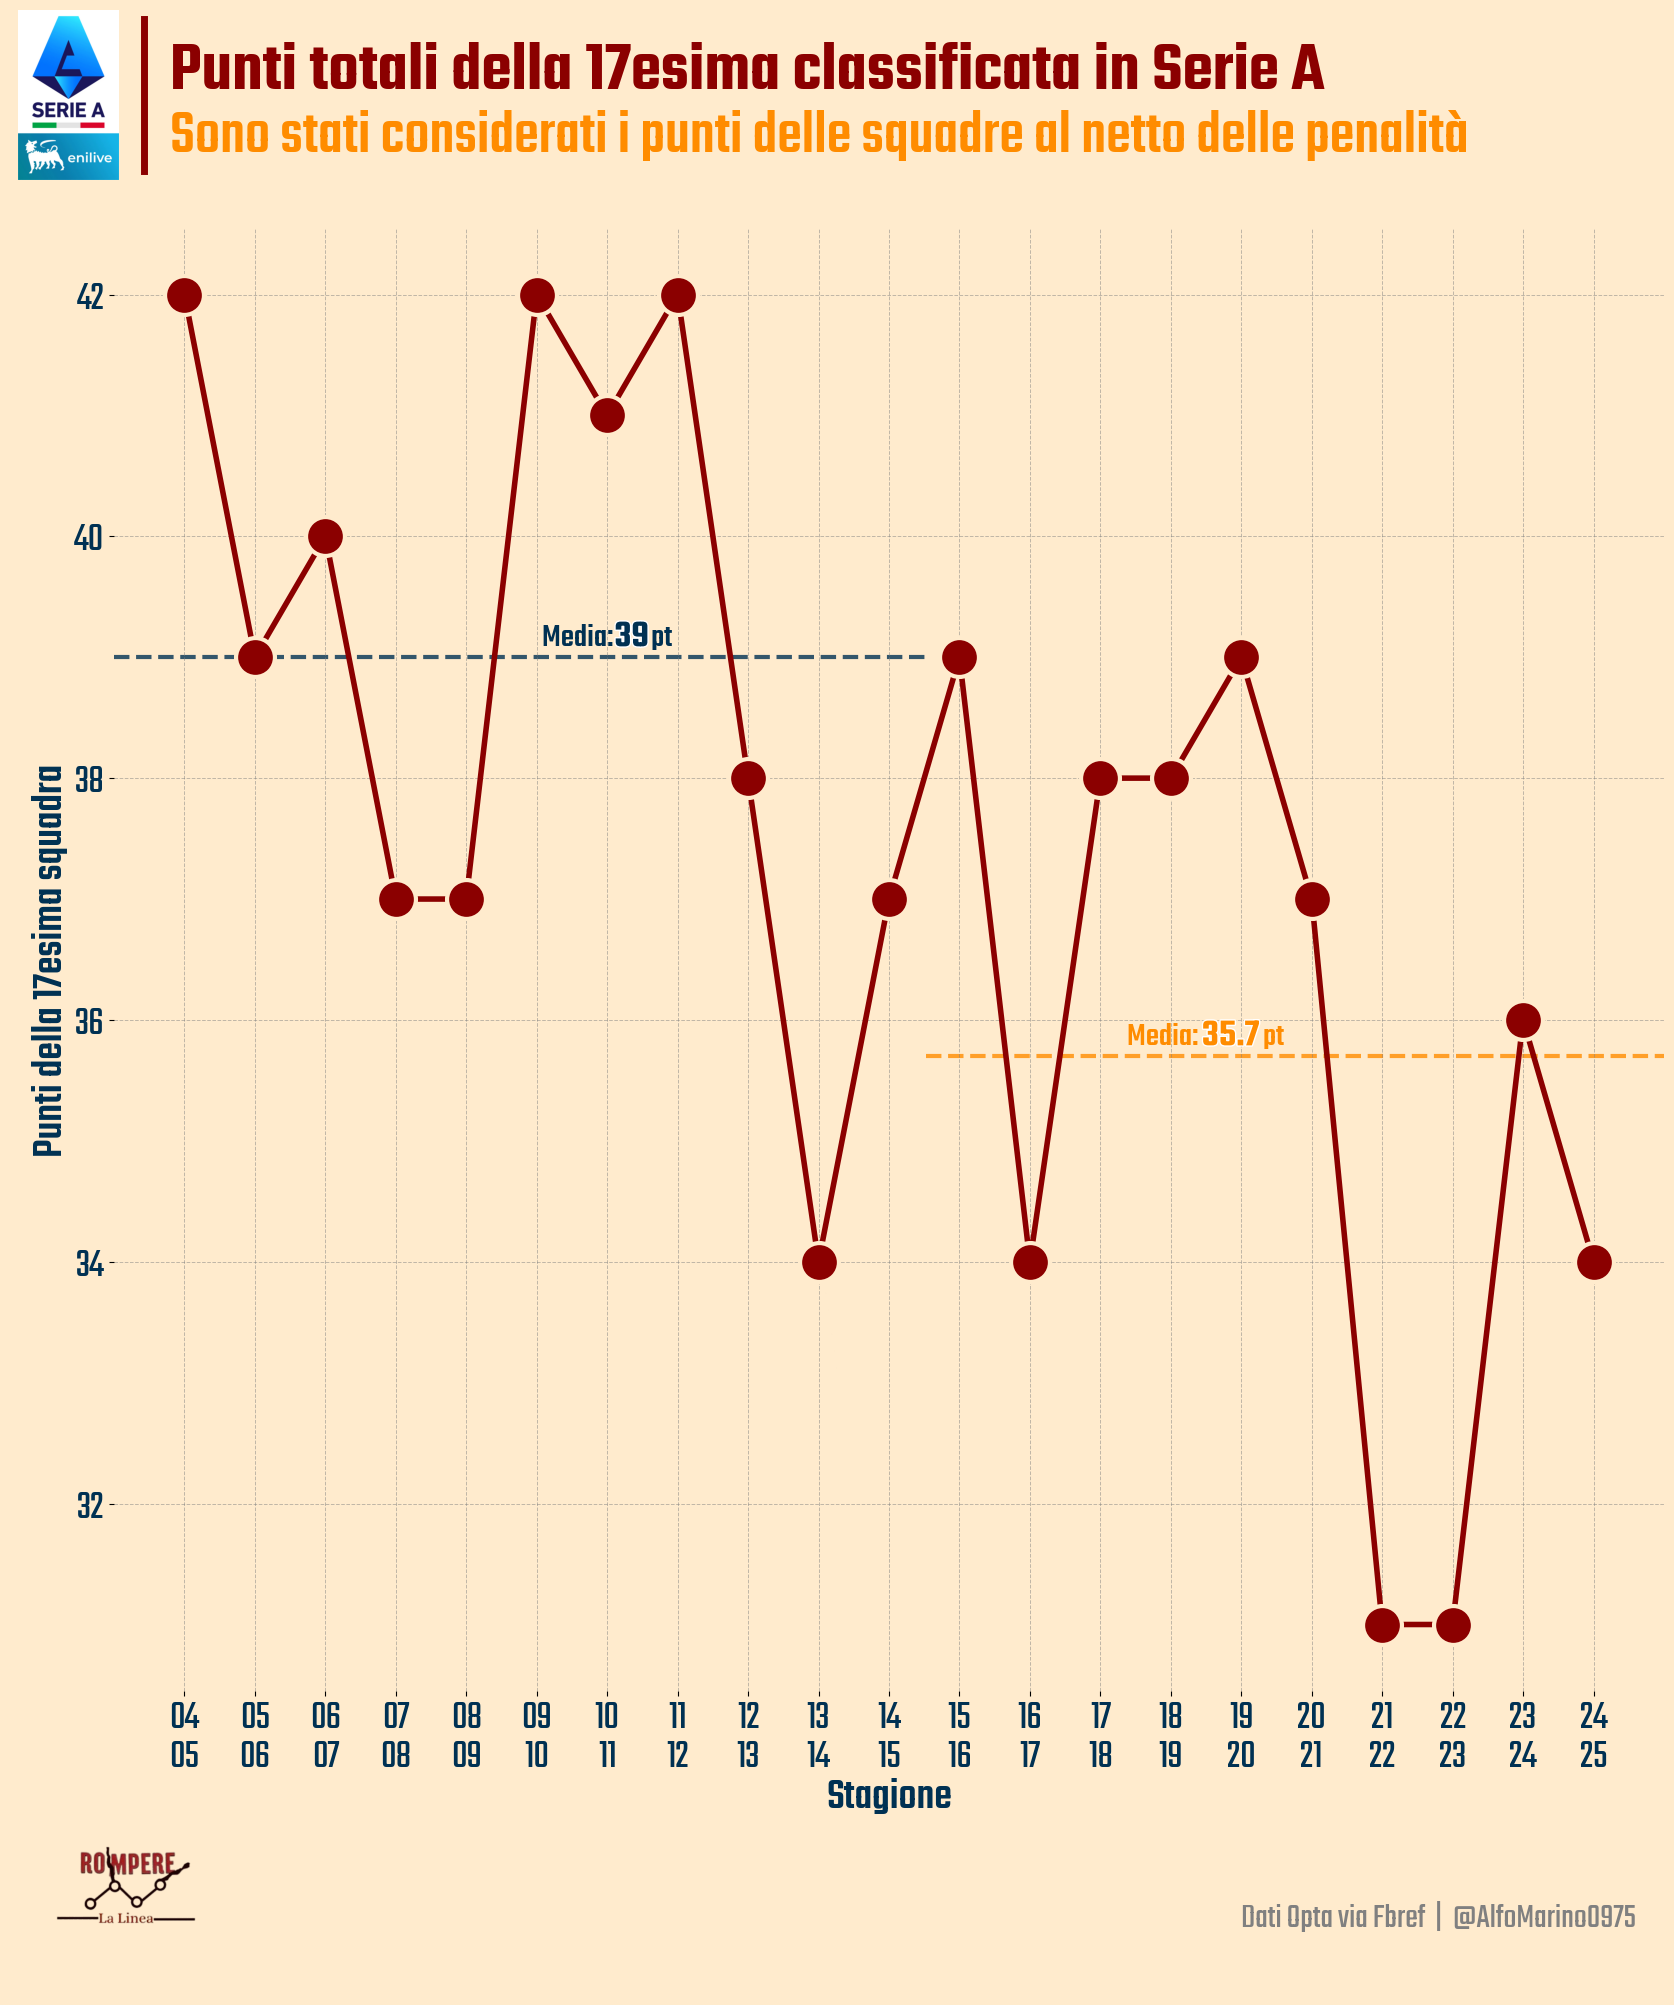

In [5]:
import matplotlib.patheffects as path_effects

path_eff = [path_effects.Stroke(linewidth=2, foreground='white'),
            path_effects.Normal()]


fig, ax = plt.subplots(figsize=(20, 19), facecolor='blanchedalmond') #18,16
ax.set_facecolor('blanchedalmond')
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7, alpha=0.5, color = "grey")

# Rimuovi assi superflui (destra e sopra)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.spines["bottom"].set_color('#003153')
#ax.spines["left"].set_color('#003153')

x_values = df["anno"]
y_values = df["punti"]
ax.plot(x_values, y_values, marker = "o", markersize = 28, color='darkred', linewidth=4, alpha = 1, markeredgecolor="blanchedalmond", markeredgewidth=3)

ax.set_ylabel("Punti della 17esima squadra", fontproperties=font_med, fontsize=32,color='#003153')
ax.set_xlabel("Stagione", fontproperties=font_med, fontsize=32,color='#003153')
plt.yticks(fontproperties=font_normal, fontsize=29, color='#003153')
plt.xticks(fontproperties=font_normal, fontsize=29, color='#003153')

# Primo periodo: 2004-05 a 2014-15 (prime 11 stagioni)
# Secondo periodo: 2015-16 a 2024-25 (ultime 10 stagioni)

primo_periodo = df.iloc[:11]  # Prime 11 stagioni
secondo_periodo = df.iloc[11:]  # Ultime 10 stagioni

media1 = primo_periodo["punti"].mean()
media2 = secondo_periodo["punti"].mean()

print(f"Media 2004-2015: {media1:.1f} punti")
print(f"Media 2015-2025: {media2:.1f} punti")
print(f"Differenza: {media2-media1:.1f} punti")

# Sostituisci la tua linea di media con queste due:
ax.axhline(y=media1, xmin=0, xmax=11/21, 
           color='#003153', linestyle='--', linewidth=3, alpha=0.8, zorder=-1)
ax.axhline(y=media2, xmin=11/21, xmax=1, 
           color='darkorange', linestyle='--', linewidth=3, alpha=0.8, zorder=-1)


# Testi esplicativi
# Testo normale + numero evidenziato sovrapposto
plt.text(6, media1 + 0.1, f"Media:       pt", 
         ha='center', color='#003153', fontsize=24, fontproperties=font_med)

# Solo il numero evidenziato (posizionato sopra)
plt.text(6.35, media1 + 0.09, f"{media1:.0f}", 
         ha='center', color='#003153', fontsize=28, fontproperties=font_semi,
         path_effects=path_eff)

# Stesso per il secondo
plt.text(14.5, media2 + 0.1, f"Media:            pt", 
         ha='center', color='darkorange', fontsize=24, fontproperties=font_med)

plt.text(14.85, media2 +0.09, f"{media2:.1f}", 
         ha='center', color='darkorange', fontsize=28, fontproperties=font_semi,
         path_effects=path_eff)


plt.text(-0.2, 43.18,"Sono stati considerati i punti delle squadre al netto delle penalità", fontsize=45, color='darkorange', fontproperties=font_med)
plt.text(-0.2, 43.7,"Punti totali della 17esima classificata in Serie A", fontsize = 50, color='darkred', fontproperties=font_semi)
plt.text(15, 28.5,"Dati Opta via Fbref  |  @AlfoMarino0975", fontsize=25, color='grey', fontproperties=font_normal, alpha = 1)

def getImage(path):
   return OffsetImage(plt.imread(path), zoom=1)

logo = plt.imread("/Users/alfonsomarino/Desktop/Progetti/IMG_2978.PNG")
logo_ax = fig.add_axes([-0.06, -0.05, 0.38, 0.12])
logo_ax.imshow(logo)
logo_ax.axis('off')

def getImage(path):
   return OffsetImage(plt.imread(path), zoom=1)

logo = plt.imread("/Users/alfonsomarino/Desktop/Serie-A-nuovo-logo.webp")
logo_ax = fig.add_axes([-0.088, 0.905, 0.38, 0.09])
logo_ax.imshow(logo)
logo_ax.axis('off')

from matplotlib.lines import Line2D

# Linea verticale di separazione vicino al logo Serie A 
# (x1, y1) e (x2, y2) sono in coordinate figura (0 a 1)
linea_vert = Line2D([0.14, 0.14], [0.91, 0.99], transform=fig.transFigure, color='darkred', linewidth=5)
fig.add_artist(linea_vert)

#plt.savefig('/Users/alfonsomarino/Desktop/17posto.png', dpi=300, bbox_inches='tight')

#plt.tight_layout()
plt.show()
